## Import libraries

In [71]:
import skfuzzy as fuzz
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
import plotly.express as px
from scipy.spatial.distance import cdist
from numba import njit
import scipy.linalg as LA
from sklearn.cluster import KMeans
from time import time

# bigger font
font = {'family' : 'helvetica','size'   : 18}
plt.rc('font', **font) 

## Simulate double gyre

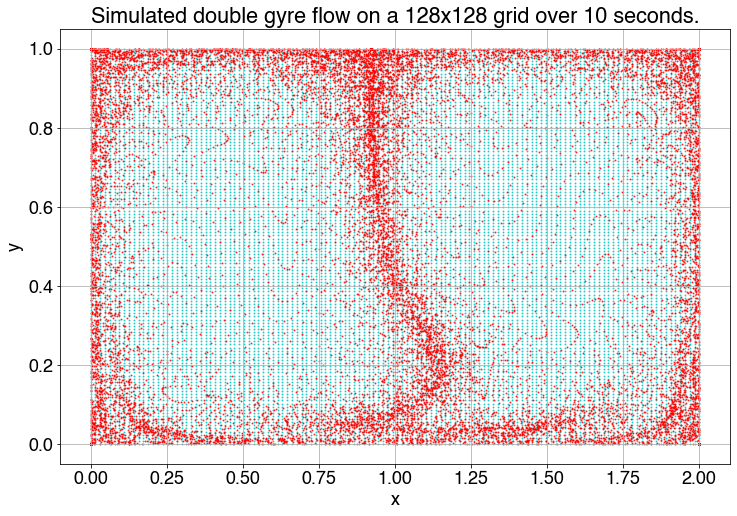

In [152]:
# constants
A = 0.25
epsilon = 0.25
w = np.pi*2 #/10

# horizontal comp.
def f(x,t):
    return epsilon*np.sin(w*t)*(x**2) + (1-2*epsilon*np.sin(w*t))*x

def u_gyre(x,y,t):
    return -np.pi*A*np.sin(np.pi*f(x,t))*np.cos(np.pi*y)

def v_gyre(x,y,t):
    return ((2*epsilon*np.sin(w*t)*x 
            + 1-2*epsilon*np.sin(w*t))*np.sin(np.pi*y)*np.pi*A*np.cos(np.pi*f(x,t)))

# function for random data init 

def rand_trace_double_gyre(Nx, Ny, final_t=20, no_t_step=201):
    
    x0 = np.linspace(0, 2, Nx)
    y0 = np.linspace(0, 1, Ny)
    
    x0, y0 =np.meshgrid(x0,y0)
    
    # time steps
    times, dt = np.linspace(0,final_t, no_t_step, retstep = True)

    # init arrays for point data
    x_pos = []
    y_pos = []

    # maybe add noise to this?

    # now reshape
    x = x0
    y = y0

    # save positions
    x_pos.append(x0)
    y_pos.append(y0)

    # loop through each time step
    for t in times:
        x1 = x + u_gyre(x,y,t)*dt
        y1 = y + v_gyre(x,y,t)*dt

        # save positions
        x_pos.append(x1)
        y_pos.append(y1)

        y = np.copy(y1)
        x = np.copy(x1)
        
    return x_pos, y_pos, dt

def rand_trace_double_gyre_old(M, final_t = 20, no_t_step = 201):

    # generate initial coords
    # draw in interval [0,1] to see it at work
    x0 = np.random.uniform(0,2,M)
    #x0 = (x0 - 0.5)*NX

    y0 = np.random.uniform(0,1,M)
    #y0 = (y0 - 0.5)*NY

    # time steps
    times, dt = np.linspace(0,final_t, no_t_step, retstep = True)

    # init arrays for point data
    x_pos = []
    y_pos = []

    # maybe add noise to this?

    # now reshape
    x = x0
    y = y0

    # save positions
    x_pos.append(x0)
    y_pos.append(y0)

    # loop through each time step
    for t in times:
        x1 = x + u_gyre(x,y,t)*dt
        y1 = y + v_gyre(x,y,t)*dt

        # save positions
        x_pos.append(x1)
        y_pos.append(y1)

        y = np.copy(y1)
        x = np.copy(x1)
        
    return x_pos, y_pos, dt

# number of data points 
M = 55**2
# M = 23**2
# M = 80**2

# end time
final_time = 10

Nx = 128
Ny = 128

# Nx = 256
# Ny = 256

x_pos, y_pos, dt = rand_trace_double_gyre(Nx, Ny, final_time, 201)

# # especially for high res
# point_size = 0.5

# for lower res
point_size = 1
    
# plotting
plt.figure(figsize=(12,8))
plt.scatter(x_pos[0], y_pos[0], color='c', 
            label = 'Initial Position', 
            alpha = 0.7, s=point_size)
plt.scatter(x_pos[-1], y_pos[-1], color='r', 
            label = 'Final posiiton',
            alpha = 0.7, s=point_size)
plt.title(f'Simulated double gyre flow on a {Nx}x{Ny} grid over {final_time} seconds.')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

In [153]:
def a_t(t):
    return epsilon*np.sin(w*t)

def b_t(t):
    return 1-2*a_t(t)

def vorticity_gyre(x,y,t):
    return A*np.pi*np.sin(np.pi*y)*(2*a_t(t)*np.cos(np.pi*f(x,t)) - (b_t(t)+1)*np.pi*np.sin(np.pi*f(x,t)))

x_dat = x_pos[100].flatten()
y_dat = y_pos[100].flatten()

vort_field = vorticity_gyre(x_dat,y_dat,my_time)

In [163]:
dt

0.05

Time: 0


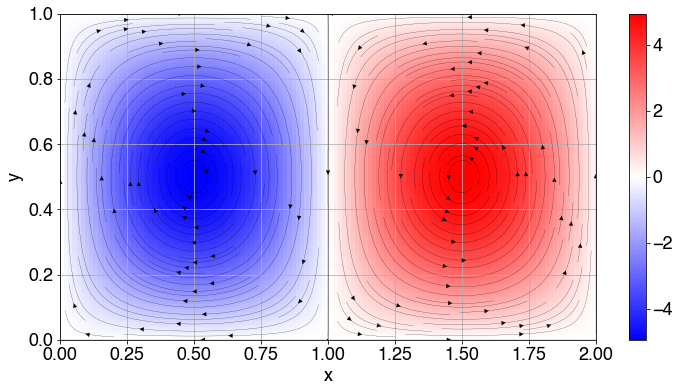

Time: 1


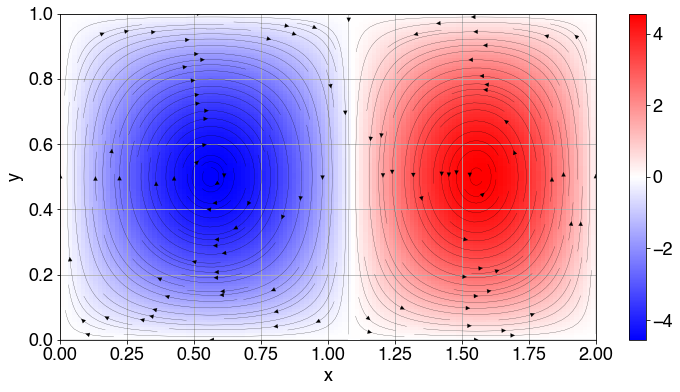

Time: 2


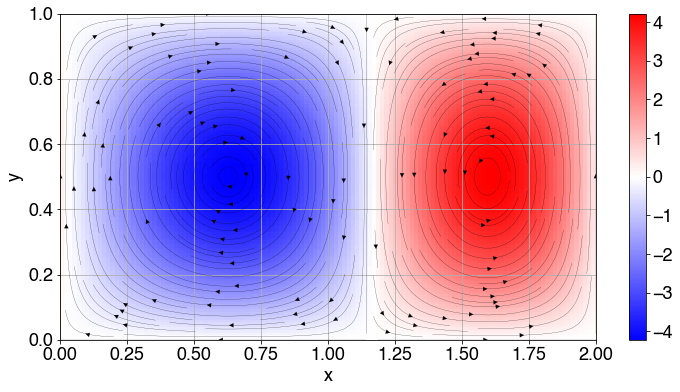

Time: 3


Time: 4


Time: 5


Time: 6


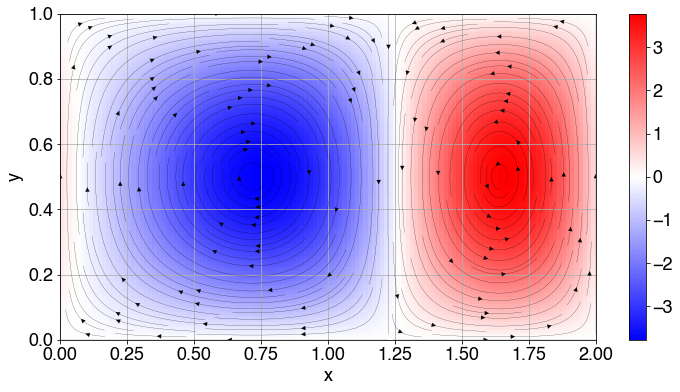

Time: 7


Time: 8


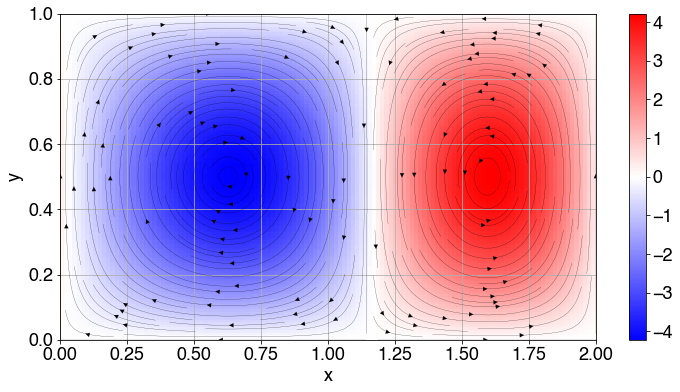

Time: 9


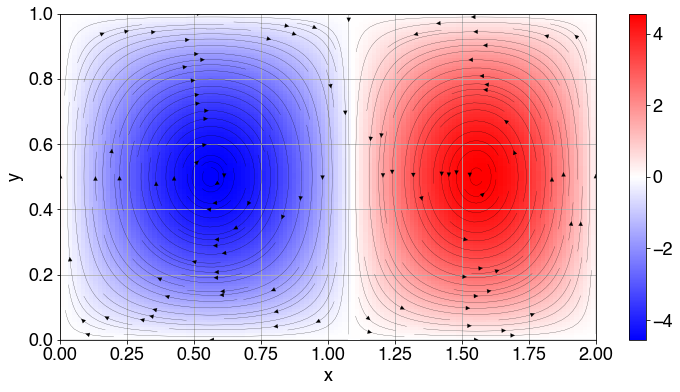

Time: 10


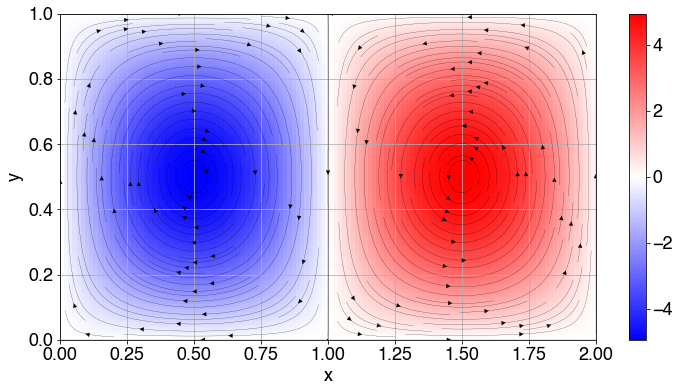

Time: 11


Time: 12


Time: 13


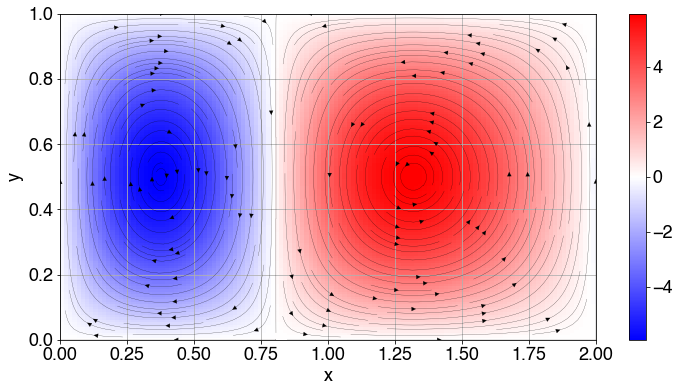

Time: 14


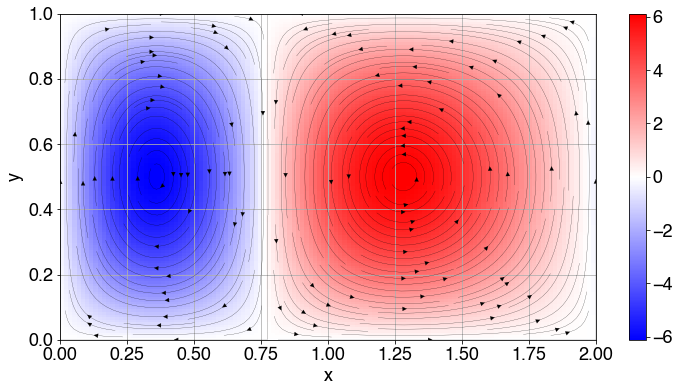

Time: 15


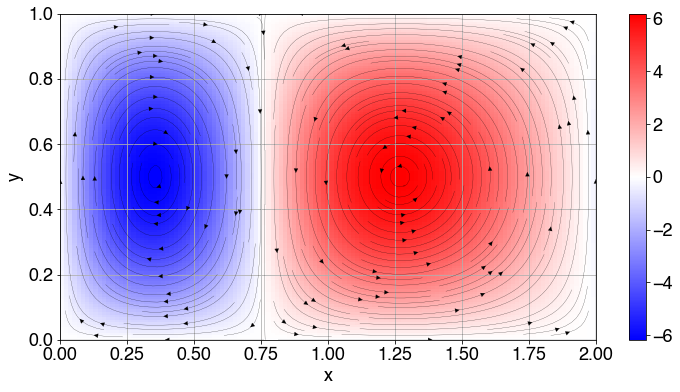

Time: 16


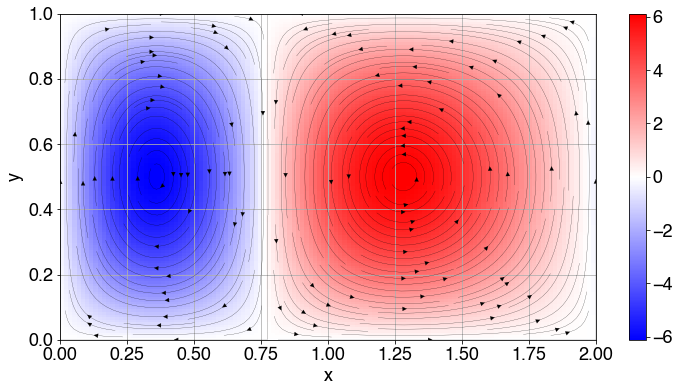

Time: 17


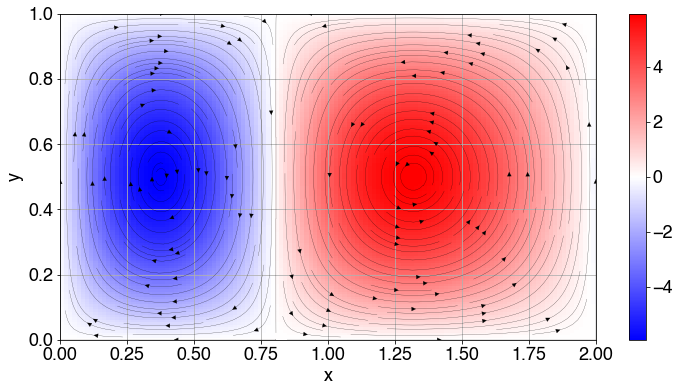

Time: 18


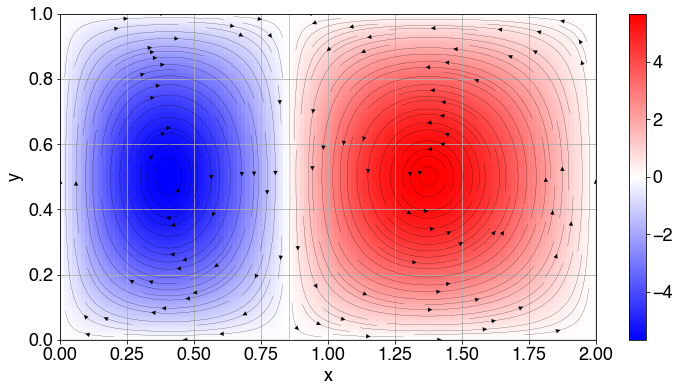

Time: 19


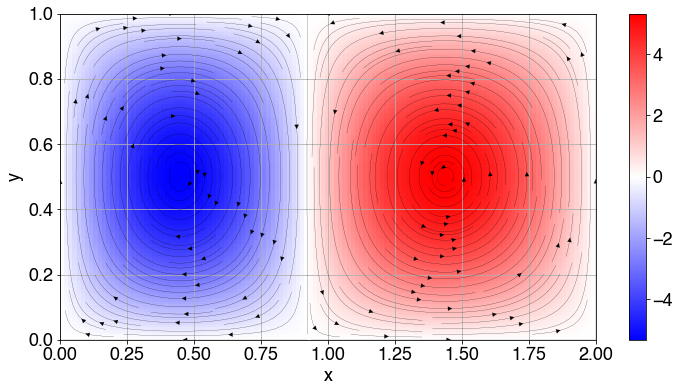

Time: 20


Time: 21


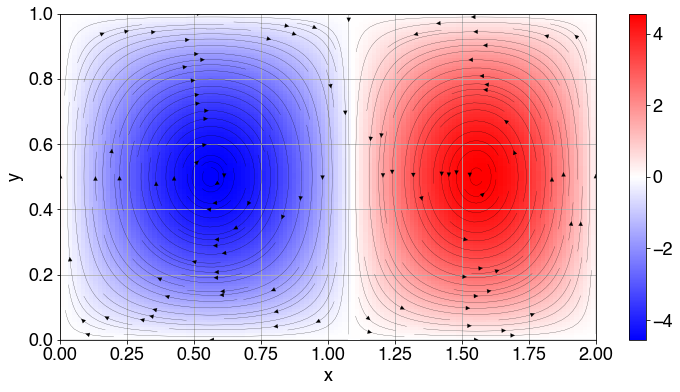

Time: 22


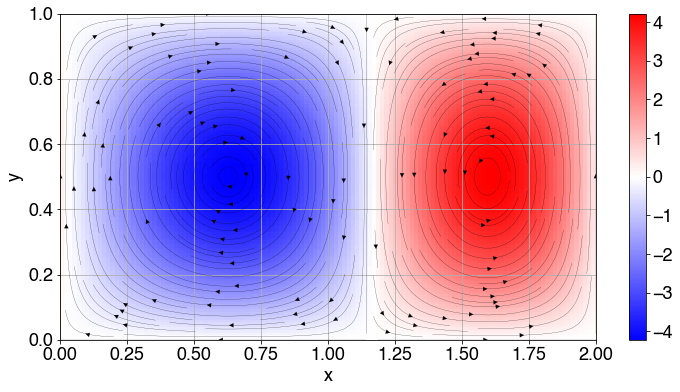

Time: 23


Time: 24


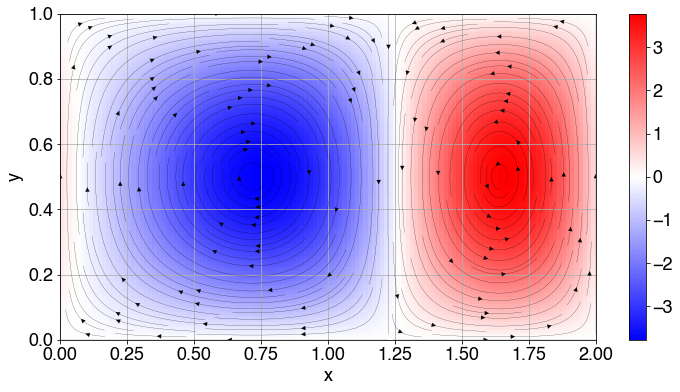

Time: 25


Time: 26


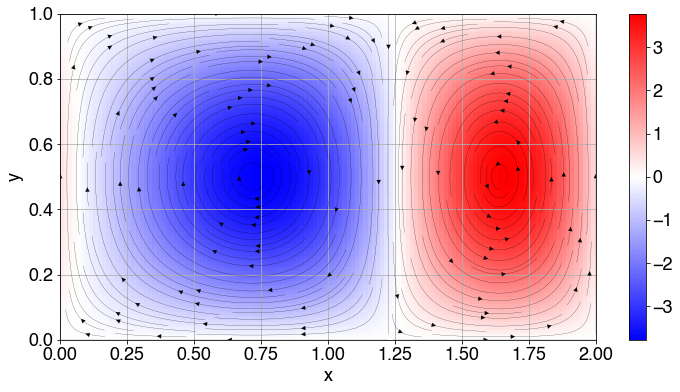

Time: 27


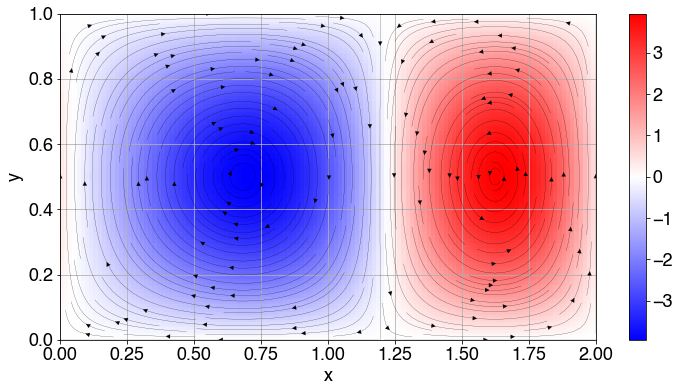

Time: 28


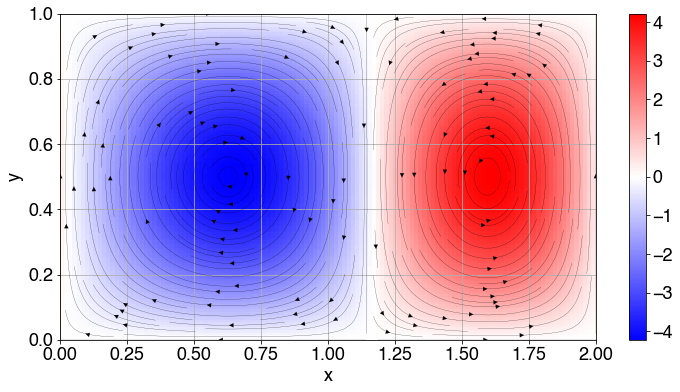

Time: 29


Time: 30


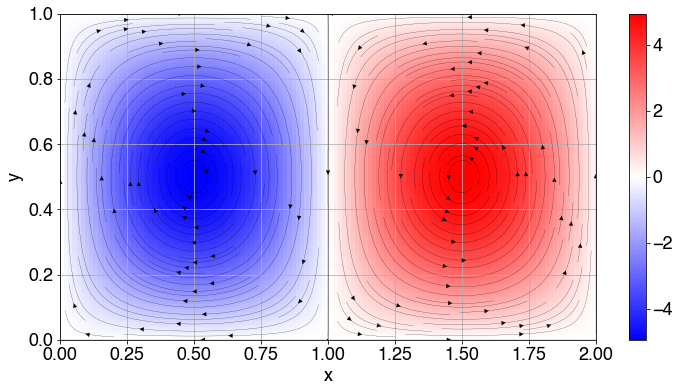

Time: 31


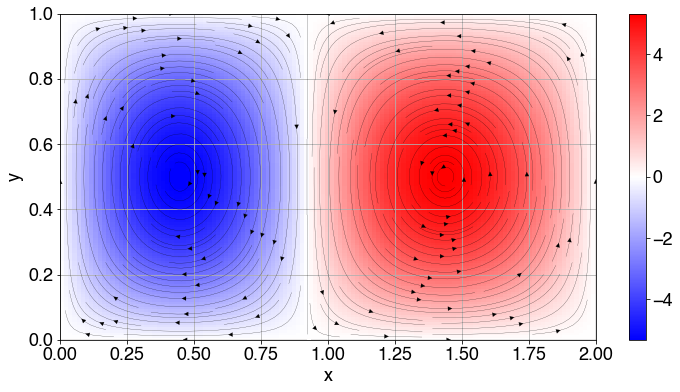

Time: 32


Time: 33


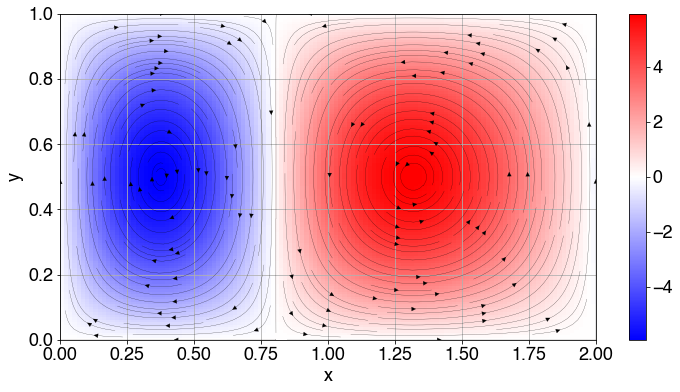

Time: 34


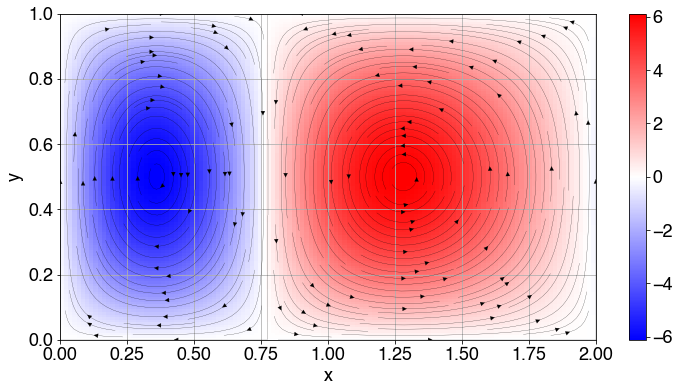

Time: 35


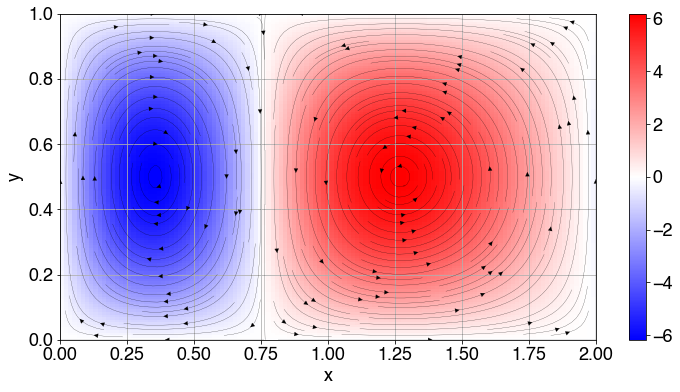

Time: 36


Time: 37


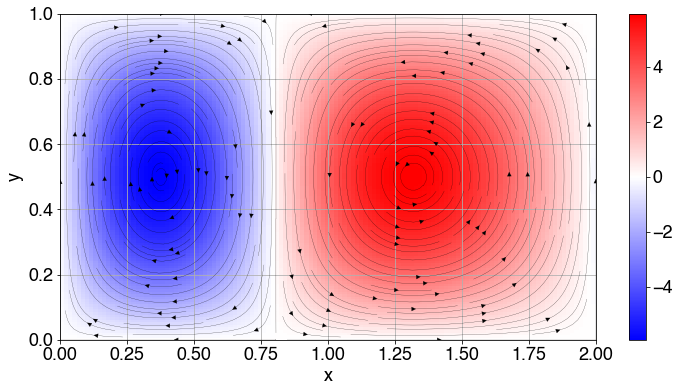

Time: 38


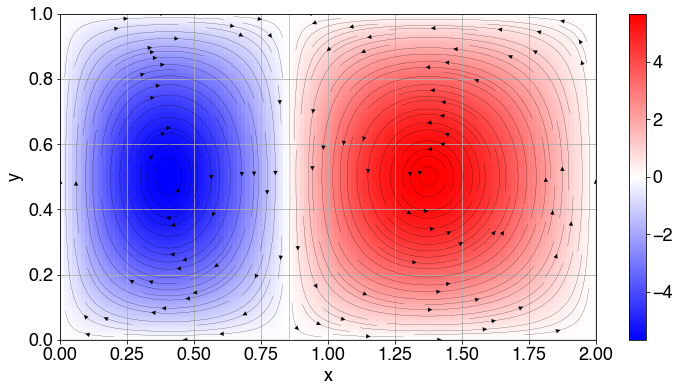

Time: 39


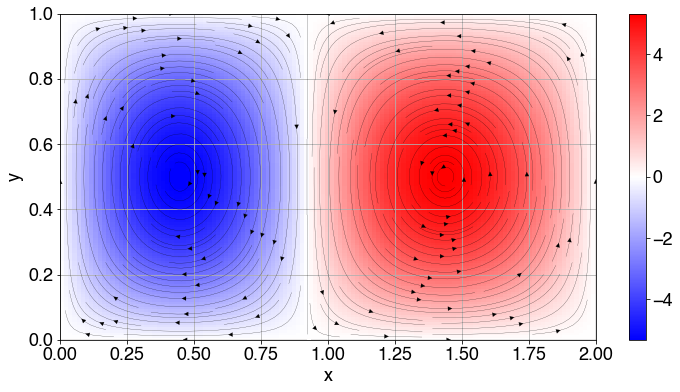

In [162]:
# create 1D arrays
x_vec = np.linspace(0,2,Nx)
y_vec = np.linspace(0,1,Ny)

# create meshgrid
xx, yy = np.meshgrid(x_vec, y_vec)

# time_inspect = [0, 2,4,10, 20, 40, 80, 120, 160, 200]
time_inspect = np.arange(40)

# loop through eacgh time
for t in time_inspect:
    
    print(f'Time: {t}')
    
    # calculate vorticity field
    vort_field = vorticity_gyre(xx,yy,t*dt)
    vort_field = np.reshape(vort_field, (Nx,Ny))
    
    u = u_gyre(xx,yy,t*dt)
    v = v_gyre(xx,yy,t*dt)
    
    plt.figure(figsize=(12,6))

    plt.streamplot(x_vec, y_vec, u, v,
                   color='black', linewidth = .2, density=2)

    plt.pcolormesh(x_vec,y_vec,vort_field, cmap='bwr')
    plt.colorbar()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.xlim((0,2))
    plt.ylim((0,1))
    plt.grid()
    plt.show()

In [ ]:
# create 1D arrays
x_vec = np.linspace(0,2,Nx)
y_vec = np.linspace(0,1,Ny)

# create meshgrid
xx, yy = np.meshgrid(x_vec, y_vec)

# choose times to inspect
time_inspect = [0, 4,12]

# loop through time steps
for t in time_inspect:
    
    # get x po
    x = x_pos[t]
    y = y_pos[t]
    
    # calculate vorticity field
    vort_field = vorticity_gyre(xx,yy,t*dt)
    vort_field = np.reshape(vort_field, (Nx,Ny))
    
    u = u_gyre(xx,yy,t*dt)
    v = v_gyre(xx,yy,t*dt)
    
    plt.figure(figsize=(8,4))

    plt.streamplot(x_vec, y_vec, u, v,
                   color='black', linewidth = .2, density=2)

    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

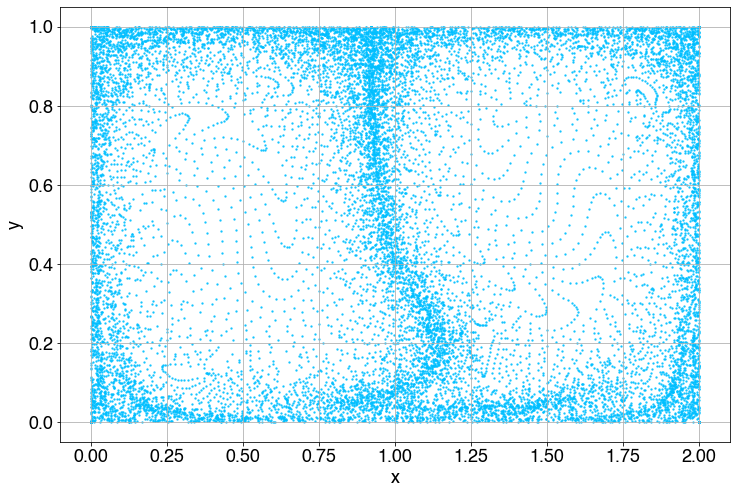

In [91]:
# for lower res
point_size = 2
    
# plotting
plt.figure(figsize=(12,8))
plt.scatter(x_pos[-1], y_pos[-1], color='deepskyblue', 
            label = 'Initial Position', 
            alpha = 0.75, s=point_size)
# plt.scatter(x_pos[-1], y_pos[-1], color='r', 
#             label = 'Final posiiton',
#             alpha = 0.7, s=point_size)

plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

In [74]:
# from celluloid import Camera

# x_traj, y_traj = x_pos, y_pos

# x_start = 0
# x_end = 2
# y_start = 0
# y_end = 1

# # # init array
# # colour_label = np.zeros_like(plot)

# # # set values based on vorticity of fluid
# # colour_label = np.where(plot > 1.002, 1, 0) # 1.002
# # ind_2 = np.where(plot<0.998) # 0.998
# # colour_label[ind_2] = 2

# # create figure object
# fig = plt.figure(figsize=(18,12))
# # load axis box
# ax = plt.axes()
# # set axis limit
# ax.set_ylim(np.min(y_traj), np.max(y_traj))
# ax.set_xlim(np.min(x_traj), np.max(x_traj))
# ax.set_xlabel('x')
# ax.set_ylabel('y')
# ax.set_title(f'Particle trajectories over T = {final_time} with timestep {dt}.\n'
#              + f'The velocity domain is defined over x $\in$ [{np.round(x_start, 4)}, {np.round(x_end, 4)}], '
#              + f'y $\in$ [{np.round(y_start, 4)}, {np.round(y_end, 4)}],\n'
#              + f'with {Nx} x gridpoints and {Ny} y gridpoints.')

# # getting colour for each individual particle
# if len(x_pos) > 1:
#     # colour array
#     no_colour = x_traj[0].flatten().shape[0]
#     colour = np.arange(no_colour)
# else:
#     colour = [0]

# # generating gif
# camera = Camera(fig)
# for i in range(0, len(x_traj), 2):
#     ax.scatter(x_traj[i], y_traj[i], cmap='coolwarm', alpha=0.85, c='salmon', s=point_size) #color = ['r', 'm', 'b', 'c', 'k'])
#     plt.grid()
#     plt.pause(0.001)
#     camera.snap()

# # saving gif
# animation = camera.animate()
# animation.save('double_gyre.gif', writer='pillow', fps=30)

## Helper functions

In [3]:
# plotting different liklihood values
def plot_cluster_likelihoods(x, y, u, fig_dim = (12,12)):
    
    #fig, axes = plt.subplots(u.shape[0], 1, sharex=True, figsize=(16,10))
    
    print(f'\nThe likelihood plots for {u.shape[1]} clusters are as follows: \n')
    
    # create bins
    bins = np.linspace(0,1,11)
    
    # loop through each cluster
    for i in range(u.shape[1]):
        
        # extract cluster likelihood
        cluster_u = u[:,i]
        
        # bin u values
        u_binned = np.digitize(cluster_u, bins)

        # plotting
        plt.figure(figsize=fig_dim)

        sns.scatterplot(x=x_dat,
                        y=y_dat,
                        hue=u_binned,
                        palette='plasma',
                        alpha=0.7,
                        legend='full')

        plt.title(f'Cluster {i+1} membership likelihood values')
        plt.legend(np.round(bins[1:],1), title='Likelihood Value')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.grid()
        plt.tight_layout()
    plt.show()
    
    print('-------------------------------------------------------------------------------------------------\n')
    
@njit
def flatten(x,y):
    return x.flatten(), y.flatten()

## Spectral Clustering

In [4]:
# constructing similarity matrix 

m = x_pos[0].flatten().shape[0]

# dist_mat = np.zeros((x_pos[0].shape[0], x_pos[0].shape[0]))
dist_mat = np.zeros((m,m))

# loop through time steps
for i in range(len(x_pos)):
    
    x, y = flatten(x_pos[i], y_pos[i])
    
    # make coordinate array
    coords = np.column_stack((x,y))
    
    # calculate distance matrix
    holder_dist_mat = cdist(coords, coords)
    
    # add dist_mat
    dist_mat += 2*holder_dist_mat
        
# remove first and last dist_mat value
correction = [0, -1]

for i in correction:
    
    x, y = flatten(x_pos[i], y_pos[i])
    
    coords = np.column_stack((x,y))
    holder_dist_mat = cdist(coords, coords)
                    
    dist_mat -= holder_dist_mat

# summation constant adjustment
dist_mat = (dt/2 * (m-1)) * 1/(final_time) * dist_mat

# make diagonals 1 
dist_mat += np.eye(m)


In [5]:
W = 1/dist_mat

sparsification_radius = 0.002

# setting diagonal value
W += np.eye(x_pos[0].flatten().shape[0]) * np.max(W) * (10**6)

# remove all similarities below threshold - sparsify
W = np.where(W <= sparsification_radius, 0, W)

# create degree matrix
D = np.diagflat(np.sum(W, axis=1))

# calc. laplacian matrix
L = D - W

# calculate D**(-0.5)
D_half = np.diagflat(np.sum(W, axis=1)**(-0.5))

# normalized graph laplacian
L = D_half @ L @ D_half

# calculate eigenvectors and vals
vals, vecs = np.linalg.eig(L)

# calculate maximum eigengap
max_eigengap = abs(max(np.diff(vals)))

# get k_gap
k_gap = np.where(abs(np.diff(vals)) == max_eigengap)[0][0]

# calc. normalised eigengap
norm_eigengap = max_eigengap / (max(vals) - min(vals))
norm_eigengap

0.7733331425480788

Time taken: 10.059549808502197
Time taken: 10.351595163345337
Time taken: 10.566638708114624
Time taken: 10.380744218826294
Time taken: 10.437530755996704
Time taken: 10.815786123275757
Time taken: 9.7705819606781
Time taken: 9.80725884437561
Time taken: 9.766610860824585
Time taken: 9.65177297592163


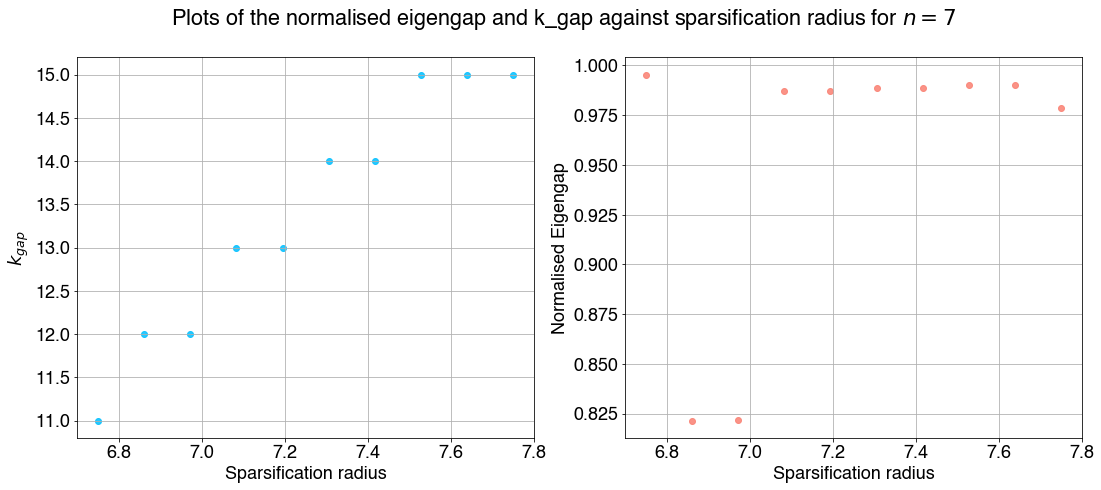

In [216]:
# get grid spacing
dx, dy = 2/Nx, 1/Ny

# list of n to loop through
n_list = [7]

r_list = np.linspace(6.75, 7.75, 10)

dominant_val = 40

# loop through n
for n in n_list:

    # init lists
    k_gap_list = []
    eigengap_list = []
    
    # loop through sparsification
    for sparsification_radius in r_list:
        
        start = time()

        W = 1/dist_mat

        # setting diagonal value - was before
        #W += np.eye(W.shape[0]) * np.max(W) * (10**n)

        # remove all similarities below threshold - sparsify
        W = np.where(W <= 1/sparsification_radius, 0, W)
        
        W += np.eye(W.shape[0]) * np.max(W) * (10**n)

        # create degree matrix
        D = np.diagflat(np.sum(W, axis=1))

        # calc. laplacian matrix
        L = D - W

        # calculate D**(-0.5)
        D_half = np.diagflat(np.sum(W, axis=1)**(-0.5))

        # normalized graph laplacian
        L = D_half @ L @ D_half

        # calculate eigenvectors and vals
        vals, vecs = np.linalg.eig(L)

        # if eig does not converge it returns 0 eigenvalues so return 0 and go to next loop
        if np.all(vals == np.zeros_like(vals)) == True or np.any(vals) == False:
            k_gap_list.append(0)
            eigengap_list.append(0)

            continue

#         vals = abs(vals)
        
#         # sort eigenvalues and eigenvectors
#         p = vals.argsort()
#         vals = vals[p]
#         vecs = vecs[:, p]
        
#         # take the 'dominant_val' largest eigenvalues
#         vals = vals[-dominant_val:]
#         vecs = vecs[:, -dominant_val:]

#         # calculate maximum eigengap - was an abs here at the beginning
#         max_eigengap = np.max(np.diff(np.sort(abs(vals))))

#         # get k_gap
#         k_gap = np.where(abs(np.diff(np.sort(vals))) == max_eigengap)[0][0]
        
#         # add k_gap to list
#         k_gap_list.append(k_gap)

#         # calc. normalised eigengap
#         norm_eigengap = max_eigengap / (max(abs(vals)) - min(abs(vals)))
        
#         # add eigengap to list
#         eigengap_list.append(norm_eigengap)

        remove_idx = np.where(vals == 0)[0]
        keep_idx = np.where(vals != 0)[0]
        
#         # check if there are any zero eigenvalues
#         if np.any(remove_idx) == True:
            
#             # remove zero eigenvals and corresponding eigenvecs
#             vals = np.delete(vals, remove_idx, axis=None)
#             vecs = np.delete(vecs, remove_idx, axis=1)

            # append zero eigenvalue
            # vals = np.concatenate(([0], vals), axis=None)

#         # sort eigenvalues and eigenvectors
#         p = abs(vals).argsort()
#         vals = vals[p]
#         vecs = vecs[:, p]
        
        # calculate maximum eigengap - was an abs here at the beginning
        max_eigengap = np.max(np.diff(vals))

        # get k_gap
        k_gap = np.where(np.diff(vals) == max_eigengap)[0][0]
        
        # add k_gap to list
        k_gap_list.append(k_gap)

        # calc. normalised eigengap
        norm_eigengap = max_eigengap / (max(vals) - min(vals))
        
        # add eigengap to list
        eigengap_list.append(norm_eigengap)
        
        end = time()
        
        print(f'Time taken: {end-start}')
              
    # plotting results
    plt.figure(figsize=(18,7))

    plt.suptitle(f'Plots of the normalised eigengap and k_gap against sparsification radius for $n = {n}$')

    plt.subplot(1,2,1)
    plt.scatter(r_list, k_gap_list, c='deepskyblue', alpha = 0.85)
    plt.xlabel('Sparsification radius')
    plt.ylabel('$k_{gap}$')
    plt.grid()

    plt.subplot(1,2,2)
    plt.scatter(r_list, eigengap_list, c='salmon', alpha = 0.85)
    plt.xlabel('Sparsification radius')
    plt.ylabel('Normalised Eigengap')
    plt.grid()
    plt.show()

In [217]:
# get grid spacing
dx, dy = 2/Nx, 1/Ny

# list of n to loop through
n_list = [7]

r_list = np.linspace(480, 510, 15)

dominant_val = 40

# loop through n
for n in n_list:

    # init lists
    k_gap_list = []
    eigengap_list = []
    
    # loop through sparsification
    for sparsification_radius in r_list:
        
        start = time()

        W = 1/dist_mat

        # setting diagonal value - was before
        #W += np.eye(W.shape[0]) * np.max(W) * (10**n)

        # remove all similarities below threshold - sparsify
        W = np.where(W <= 1/sparsification_radius, 0, W)
        
        W += np.eye(W.shape[0]) * np.max(W) * (10**n)

        # create degree matrix
        D = np.diagflat(np.sum(W, axis=1))

        # calc. laplacian matrix
        L = D - W

        # calculate D**(-0.5)
        D_half = np.diagflat(np.sum(W, axis=1)**(-0.5))

        # normalized graph laplacian
        L = D_half @ L @ D_half

        # calculate eigenvectors and vals
        vals, vecs = np.linalg.eig(L)
        
        # calculate maximum eigengap - was an abs here at the beginning
        max_eigengap = np.max(np.diff(vals))

        # get k_gap
        k_gap = np.where(np.diff(vals) == max_eigengap)[0][0]
        
        # add k_gap to list
        k_gap_list.append(k_gap)

        # calc. normalised eigengap
        norm_eigengap = max_eigengap / (max(vals) - min(vals))
        
        # add eigengap to list
        eigengap_list.append(norm_eigengap)
        
        end = time()
        
        print(f'Time taken: {end-start}')
              
    # plotting results
    plt.figure(figsize=(18,7))

    plt.suptitle(f'Plots of the normalised eigengap and k_gap against sparsification radius for $n = {n}$')

    plt.subplot(1,2,1)
    plt.scatter(r_list, k_gap_list, c='deepskyblue', alpha = 0.85)
    plt.xlabel('Sparsification radius')
    plt.ylabel('$k_{gap}$')
    plt.grid()

    plt.subplot(1,2,2)
    plt.scatter(r_list, eigengap_list, c='salmon', alpha = 0.85)
    plt.xlabel('Sparsification radius')
    plt.ylabel('Normalised Eigengap')
    plt.grid()
    plt.show()

Time taken: 34.93191075325012
Time taken: 36.13505005836487
Time taken: 35.10285806655884
Time taken: 33.97398805618286
Time taken: 35.02314805984497
Time taken: 36.53049993515015
Time taken: 35.72563290596008
Time taken: 35.74046969413757
Time taken: 35.68760085105896
Time taken: 36.788244009017944
Time taken: 34.63248109817505
Time taken: 36.58281111717224
Time taken: 36.07725977897644
Time taken: 37.75544500350952
Time taken: 36.563708782196045


In [30]:
# get grid spacing
dx, dy = 2/Nx, 1/Ny

# list of n to loop through
n_list = [7]

r_list = np.linspace(6.75, 7.75, 10)

dominant_val = 40

# loop through n
for n in n_list:

    # init lists
    k_gap_list = []
    eigengap_list = []
    
    # loop through sparsification
    for sparsification_radius in r_list:
        
        start = time()

        W = 1/dist_mat

        # setting diagonal value - was before
        #W += np.eye(W.shape[0]) * np.max(W) * (10**n)

        # remove all similarities below threshold - sparsify
        W = np.where(W <= 1/sparsification_radius, 0, W)
        
        W += np.eye(W.shape[0]) * np.max(W) * (10**n)

        # create degree matrix
        D = np.diagflat(np.sum(W, axis=1))

        # calc. laplacian matrix
        L = D - W

        # calculate D**(-0.5)
        D_half = np.diagflat(np.sum(W, axis=1)**(-0.5))

        # normalized graph laplacian
        L = D_half @ L @ D_half

        # calculate eigenvectors and vals
        vals, vecs = np.linalg.eig(L)

        # if eig does not converge it returns 0 eigenvalues so return 0 and go to next loop
        if np.all(vals == np.zeros_like(vals)) == True or np.any(vals) == False:
            k_gap_list.append(0)
            eigengap_list.append(0)

            continue

#         vals = abs(vals)
        
#         # sort eigenvalues and eigenvectors
#         p = vals.argsort()
#         vals = vals[p]
#         vecs = vecs[:, p]
        
#         # take the 'dominant_val' largest eigenvalues
#         vals = vals[-dominant_val:]
#         vecs = vecs[:, -dominant_val:]

#         # calculate maximum eigengap - was an abs here at the beginning
#         max_eigengap = np.max(np.diff(np.sort(abs(vals))))

#         # get k_gap
#         k_gap = np.where(abs(np.diff(np.sort(vals))) == max_eigengap)[0][0]
        
#         # add k_gap to list
#         k_gap_list.append(k_gap)

#         # calc. normalised eigengap
#         norm_eigengap = max_eigengap / (max(abs(vals)) - min(abs(vals)))
        
#         # add eigengap to list
#         eigengap_list.append(norm_eigengap)

        remove_idx = np.where(vals == 0)[0]
        keep_idx = np.where(vals != 0)[0]
        
#         # check if there are any zero eigenvalues
#         if np.any(remove_idx) == True:
            
#             # remove zero eigenvals and corresponding eigenvecs
#             vals = np.delete(vals, remove_idx, axis=None)
#             vecs = np.delete(vecs, remove_idx, axis=1)

            # append zero eigenvalue
            # vals = np.concatenate(([0], vals), axis=None)

#         # sort eigenvalues and eigenvectors
#         p = abs(vals).argsort()
#         vals = vals[p]
#         vecs = vecs[:, p]
        
        # calculate maximum eigengap - was an abs here at the beginning
        max_eigengap = np.max(np.diff(vals))

        # get k_gap
        k_gap = np.where(np.diff(vals) == max_eigengap)[0][0]
        
        # add k_gap to list
        k_gap_list.append(k_gap)

        # calc. normalised eigengap
        norm_eigengap = max_eigengap / (max(vals) - min(vals))
        
        # add eigengap to list
        eigengap_list.append(norm_eigengap)
        
        end = time()
        
        print(f'Time taken: {end-start}')
              
    # plotting results
    plt.figure(figsize=(18,7))

    plt.suptitle(f'Plots of the normalised eigengap and k_gap against sparsification radius for $n = {n}$')

    plt.scatter(r_list, eigengap_list, c='salmon', alpha = 0.85)
    plt.xlabel('Sparsification radius')
    plt.ylabel('Normalised Eigengap')
    plt.grid()
    
r_list = np.linspace(480, 510, 15)

dominant_val = 40

# loop through n
for n in n_list:

    # init lists
    k_gap_list = []
    eigengap_list_2 = []
    
    # loop through sparsification
    for sparsification_radius in r_list:
        
        start = time()

        W = 1/dist_mat

        # setting diagonal value - was before
        #W += np.eye(W.shape[0]) * np.max(W) * (10**n)

        # remove all similarities below threshold - sparsify
        W = np.where(W <= 1/sparsification_radius, 0, W)
        
        W += np.eye(W.shape[0]) * np.max(W) * (10**n)

        # create degree matrix
        D = np.diagflat(np.sum(W, axis=1))

        # calc. laplacian matrix
        L = D - W

        # calculate D**(-0.5)
        D_half = np.diagflat(np.sum(W, axis=1)**(-0.5))

        # normalized graph laplacian
        L = D_half @ L @ D_half

        # calculate eigenvectors and vals
        vals, vecs = np.linalg.eig(L)
        
        # calculate maximum eigengap - was an abs here at the beginning
        max_eigengap = np.max(np.diff(vals))

        # get k_gap
        k_gap = np.where(np.diff(vals) == max_eigengap)[0][0]
        
        # add k_gap to list
        k_gap_list.append(k_gap)

        # calc. normalised eigengap
        norm_eigengap = max_eigengap / (max(vals) - min(vals))
        
        # add eigengap to list
        eigengap_list_2.append(norm_eigengap)
        
        end = time()
        
        print(f'Time taken: {end-start}')
              
    # plotting results

    plt.suptitle(f'Plots of the normalised eigengap and k_gap against sparsification radius for $n = {n}$')

    plt.subplot(1,2,2)
    plt.scatter(r_list, eigengap_list_2, c='salmon', alpha = 0.85)
    plt.xlabel('Sparsification radius')
    plt.ylabel('Normalised Eigengap')
    plt.grid()
    plt.show()

Time taken: 9.626965045928955
Time taken: 9.463695049285889
Time taken: 9.3747718334198
Time taken: 9.318634033203125
Time taken: 9.782629013061523
Time taken: 9.639462232589722
Time taken: 9.572781085968018
Time taken: 9.68001413345337
Time taken: 9.775339126586914
Time taken: 9.314703941345215
Time taken: 38.10479402542114
Time taken: 36.11826992034912
Time taken: 35.92785382270813
Time taken: 36.05887508392334
Time taken: 35.83850812911987
Time taken: 36.38176226615906
Time taken: 37.269275188446045
Time taken: 38.01316595077515
Time taken: 36.261037826538086
Time taken: 36.639174938201904
Time taken: 36.21436285972595
Time taken: 36.03892707824707
Time taken: 36.64690375328064
Time taken: 36.02804613113403
Time taken: 35.6166353225708


In [33]:
r_list = np.linspace(280, 310, 15)

dominant_val = 40

# loop through n
for n in n_list:

    # init lists
    k_gap_list = []
    eigengap_list_3 = []
    
    # loop through sparsification
    for sparsification_radius in r_list:
        
        start = time()

        W = 1/dist_mat

        # setting diagonal value - was before
        #W += np.eye(W.shape[0]) * np.max(W) * (10**n)

        # remove all similarities below threshold - sparsify
        W = np.where(W <= 1/sparsification_radius, 0, W)
        
        W += np.eye(W.shape[0]) * np.max(W) * (10**n)

        # create degree matrix
        D = np.diagflat(np.sum(W, axis=1))

        # calc. laplacian matrix
        L = D - W

        # calculate D**(-0.5)
        D_half = np.diagflat(np.sum(W, axis=1)**(-0.5))

        # normalized graph laplacian
        L = D_half @ L @ D_half

        # calculate eigenvectors and vals
        vals, vecs = np.linalg.eig(L)
        
        # calculate maximum eigengap - was an abs here at the beginning
        max_eigengap = np.max(np.diff(vals))

        # get k_gap
        k_gap = np.where(np.diff(vals) == max_eigengap)[0][0]
        
        # add k_gap to list
        k_gap_list.append(k_gap)

        # calc. normalised eigengap
        norm_eigengap = max_eigengap / (max(vals) - min(vals))
        
        # add eigengap to list
        eigengap_list_3.append(norm_eigengap)
        
        end = time()
        
        print(f'Time taken: {end-start}')

Time taken: 46.4124550819397
Time taken: 44.132144927978516
Time taken: 44.6907742023468
Time taken: 43.00918889045715
Time taken: 42.06362318992615
Time taken: 43.04653978347778
Time taken: 44.02358078956604
Time taken: 41.416054010391235
Time taken: 42.169058084487915
Time taken: 42.80650806427002
Time taken: 42.70735430717468
Time taken: 44.58001089096069
Time taken: 44.640048027038574
Time taken: 43.83496904373169
Time taken: 41.55490779876709


In [35]:
r_list = np.linspace(280, 310, 15)

plt.scatter(r_list, eigengap_list_3, c='salmon', alpha = 0.85)
plt.xlabel('Sparsification radius')
plt.ylabel('Normalised Eigengap')
plt.grid()
plt.show()

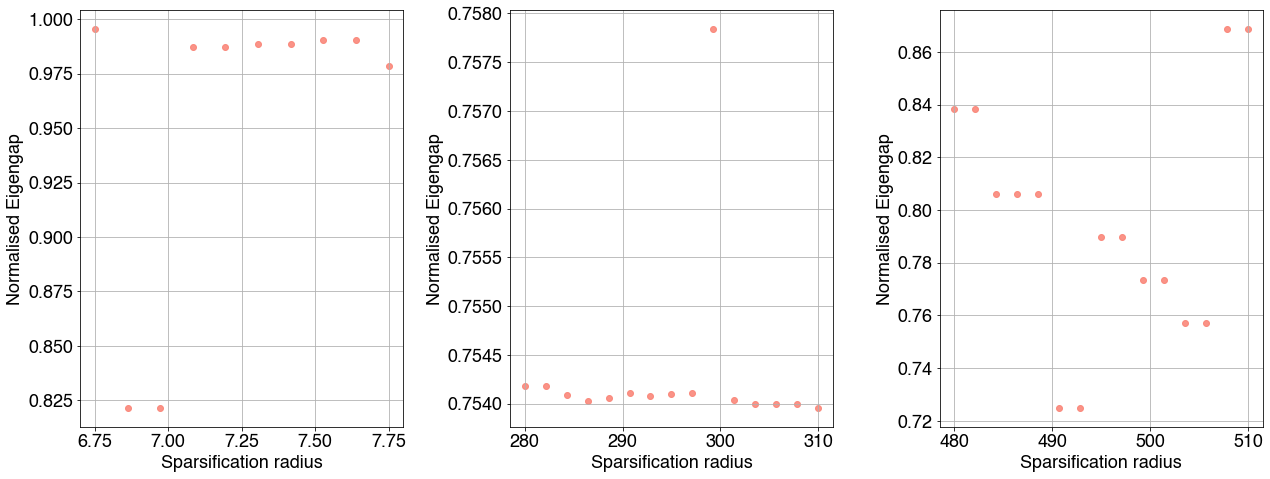

In [40]:
# plotting results
plt.figure(figsize=(18,7))
plt.subplot(131)
r_list = np.linspace(6.75, 7.75, 10)

#plt.suptitle(f'Plots of the normalised eigengap and k_gap against sparsification radius for $n = {n}$')

plt.scatter(r_list, eigengap_list, c='salmon', alpha = 0.85)
plt.xlabel('Sparsification radius')
plt.ylabel('Normalised Eigengap')
plt.grid()

r_list = np.linspace(280, 310, 15)

plt.subplot(132)
plt.scatter(r_list, eigengap_list_3, c='salmon', alpha = 0.85)
plt.xlabel('Sparsification radius')
plt.ylabel('Normalised Eigengap')
plt.grid()

r_list = np.linspace(480, 510, 15)

plt.subplot(1,3,3)
plt.scatter(r_list, eigengap_list_2, c='salmon', alpha = 0.85)
plt.xlabel('Sparsification radius')
plt.ylabel('Normalised Eigengap')
plt.grid()
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.cluster import SpectralClustering, KMeans
from scipy.linalg import fractional_matrix_power

# max_norm_eigengap_idx = np.where(eigengap_list == np.max(eigengap_list))[0][0]

# sparsification_radius = r_list[max_norm_eigengap_idx]

r_maxs = [7.2, 300, 510]
r_maxs = [1/0.0002]


#sparsification_radius = 1/0.002
# sparsification_radius = 510
# sparsification_radius = 300

idx = 1

plt.figure(figsize=(12,18))

no_clust = 16

for sparsification_radius in r_maxs:

    n = 7

    W = 1/dist_mat
    
    # setting diagonal value
    W += np.eye(W.shape[0]) * np.max(W) * (10**n)

    # remove all similarities below threshold - sparsify
    W = np.where(W <= 1/sparsification_radius, 0, W)

    # create degree matrix
    D = np.diagflat(np.sum(W, axis=1))
    
    D_half = np.diagflat(np.sum(W, axis=1)**(-0.5))

    # calc. laplacian matrix - approx Ncut
    L = D - W
    
    # normalized laplacian
    L = D_half @ L @ D_half
    
    vals, vecs = np.linalg.eig(L)
    
    # less than zero values introduced by rounding error
    vals = np.where(vals < 0, 0, vals)
    
    vals, idx = np.unique(vals, return_index=True)
    vecs = vecs[:,idx]
    
    vals_view = np.sort(vals)[:30]

    plt.figure(figsize=(10,6))
    plt.plot((np.arange(len(vals_view)) + 1), np.sort(vals_view), '-o', c='deepskyblue')
    plt.grid()
    plt.xlabel('Eigenvalue index')
    plt.ylabel('Eigenvalue')
    plt.show()
    
    
    # solve gen eigen of Lu = \lambda D u -> D^-1L u = \lambda u
#     vals, vecs = np.linalg.eig(np.linalg.inv(D) @ L)

    # calculate D**(-0.5)
#     D_half = np.diagflat(np.sum(W, axis=1)**(-0.5))
#     D_half = D**(-0.5)
    
#     # test
#     print(D_half == fractional_matrix_power(D, -0.5))
    
#     # alternate method
#     D_half = fractional_matrix_power(D, -0.5)

#     # normalized graph laplacian
#     L = D_half @ L @ D_half

#     # calculate eigenvectors and vals
#     vals, vecs = np.linalg.eig(L)
    
#     gen_vals, gen_vecs = np.linalg.eig(np.linalg.inv(D) @ L)
    
    # calculate maximum eigengap
    max_eigengap = max(abs(np.diff(vals)))

    # get k_gap
    k_gap = np.where(abs(np.diff(vals)) == max_eigengap)[0][0]
    
    # create U matrix
    U = vecs[:,:k_gap]

    
    k_dom = len(np.where(gen_vals == 0)[0])
    
    u_vals = gen_vals[:k_gap]
    U = gen_vecs[:,:k_gap]
    
    
    #vals_plot = vals[:10]

#     plt.figure(figsize=(10,6))
#     plt.subplot(121)
#     plt.plot((np.arange(len(vals_plot)) + 1), vals_plot, '-o', c='deepskyblue')
#     plt.grid()
#     plt.xlabel('Eigenvalue index')
#     plt.ylabel('Eigenvalue')

#     plt.subplot(122)
#     plt.plot((np.arange(len(vals_plot)) + 1)[:-1], np.diff(vals_plot), '-o', c='salmon')
#     plt.grid()
#     plt.xlabel('Eigengap index')
#     plt.ylabel('Eigengap')
#     plt.show()

    # fit spectral clustering
    sc = SpectralClustering(2, affinity='precomputed').fit(W)

    # plot initial position with labels
    plt.figure(figsize=(12,6))
    sns.scatterplot(x=x_pos[0].flatten(),
                    y=y_pos[0].flatten(),
                    hue=sc.labels_,
                    palette = 'tab20', 
                    alpha = 0.85)
    plt.show()


    # # automatically detect no_clusters from eigengap
    no_clust = np.where(np.diff(vals) == np.max(np.diff(vals)))[0][0]
    print(f'The number of clusters is: {no_clust+2}')
    
#     no_clust = 0
    
    #k_gap
    
    result = KMeans(no_clust+2, init='random',
                   max_iter = 10000, algorithm='full',
                   tol = 10**(-4), n_init=50).fit(U)

    # plot initial position with labels
    plt.figure(figsize=(8,6))
    # plt.subplot(3,1,idx)
    sns.scatterplot(x=x_pos[0].flatten(),
                    y=y_pos[0].flatten(),
                    hue=result.labels_,
                    palette = 'bright', # originally bright
                    alpha = 0.75) 
    plt.legend(title='Cluster label', bbox_to_anchor=(1.005,1))
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid()
    plt.show()
    
#     idx += 1
    
plt.show()

In [38]:
vals_view = vals[:30]

plt.figure(figsize=(10,6))
plt.plot((np.arange(len(vals_view)) + 1), vals_view, '-o', c='deepskyblue')
plt.grid()
plt.xlabel('Eigenvalue index')
plt.ylabel('Eigenvalue')
plt.show()

In [40]:
vals[np.where(vals < 0)[0]]

array([-8.81020570e-18, -1.16295084e-16, -1.36815702e-17, -3.67968245e-18,
       -8.32374989e-18, -3.92401244e-18, -9.53579764e-17, -3.47113907e-17,
       -2.12772890e-17, -2.41537490e-17, -8.21891589e-17, -7.43269769e-17])

In [30]:
font = {'family' : 'helvetica','size'   : 18}
plt.rc('font', **font) 

vals_plot = vals[:70]

plt.figure(figsize=(9,7))
plt.scatter((np.arange(len(vals_plot))+1)[:-1], np.diff(vals_plot),
            alpha=0.8, c='salmon', s=12)
plt.xlabel('Eigengap index')
plt.ylabel('Eigengap')
plt.grid()
plt.show()

max_idx = np.where(np.diff(vals) == np.max(np.diff(vals)))[0][0]
max_idx

63

In [ ]:
plt.figure(figsize=(14,10))
plt.scatter(np.arange(len(vals))[:100] + 1, vals[:100])
plt.grid()
plt.show()

---
## This appears to work but doesn't always converge
I think this is due to parameter choices but it's hard to say. Theres also an error in the eigengap, it should be somewhere in the range of 

(4096, 63)


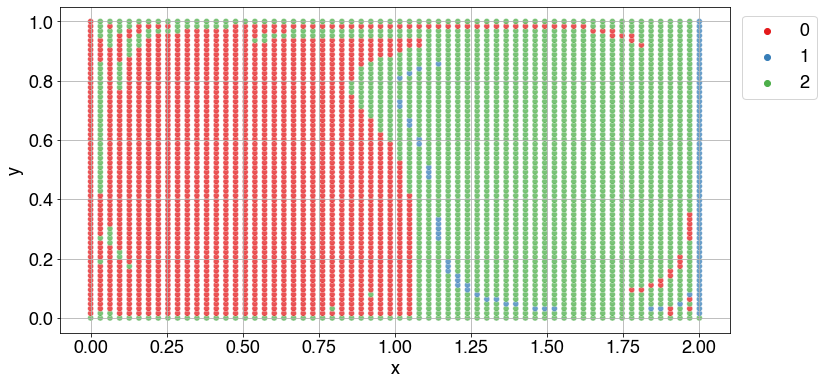

In [22]:
# get 'U' matrix
kmeans_vecs = vecs[:, :(k_gap)]

legend_lab = np.arange(3) + 1

print(kmeans_vecs.shape)

# Run k means on normalized laplacian eigenvectors

# result = KMeans(k_gap+1, init='random',
#                max_iter = 10000, algorithm='full',
#                tol = 10**(-16), n_init=50).fit(vecs)

# NOTE USED TO GEN FIGURE

result = KMeans(3, init='random',
               max_iter = 10000, algorithm='full',
               tol = 10**(-16), n_init=50).fit(vecs)


# plot initial position with labels
plt.figure(figsize=(12,6))
sns.scatterplot(x=x_pos[0].flatten(),
                y=y_pos[0].flatten(),
                hue=result.labels_,
                palette = 'Set1', # originally bright
                alpha = 0.75) 
plt.legend(bbox_to_anchor=(1.005,1))
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


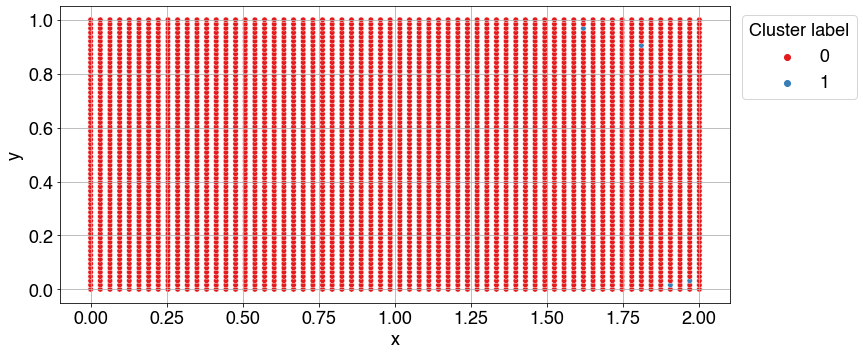

In [13]:
from sklearn.cluster import SpectralClustering

# fit spectral clustering
sc = SpectralClustering(2, affinity='precomputed').fit(W)

legend_lab = np.arange(3)+1
point_size=30



# plot initial position with labels
#plt.subplots(1,2,1)
# plt.figure(figsize=(12,6))
plt.figure(figsize=(12,12))
plt.subplot(2,1,1)
sns.scatterplot(x=x_pos[0].flatten(),
                y=y_pos[0].flatten(),
                hue=sc.labels_,
                palette = 'Set1',
                s = point_size,
                legend='full')
# plt.title('Clustering Result')
plt.legend(title='Cluster label', bbox_to_anchor=(1.005,1))
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

# Rubbish that works for some reason?

In [165]:
max_norm_eigengap_idx = np.where(eigengap_list == np.max(eigengap_list))[0][0]

sparsification_radius = r_list[max_norm_eigengap_idx]

# This works !
sparsification_radius = 1/0.002

# sparsification_radius = 1/0.02

n = 7

W = 1/dist_mat

dominant_value = 10

# remove all similarities below threshold - sparsify
W = np.where(W <= 1/sparsification_radius, 0, W)

# setting diagonal value
W += np.eye(W.shape[0]) * np.max(W) * (10**n)

# create degree matrix
D = np.diagflat(np.sum(W, axis=1))

# calc. laplacian matrix
L = D - W

# calculate D**(-0.5)
D_half = np.diagflat(np.sum(W, axis=1)**(-0.5))

# normalized graph laplacian
L = D_half @ L @ D_half

# calculate eigenvectors and vals
vals, vecs = np.linalg.eig(L)

# take absolute value of eigenvectors
# abs_vals = abs(vals)

# sort eigenvalues and eigenvectors
# p = abs_vals.argsort()
# vals = vals[p]
# vecs = vecs[:, p]

# vals = vals[-dominant_val:]
# vecs = vecs[:, -dominant_val:]

# calculate maximum eigengap
max_eigengap = max(np.diff(vals))

# get k_gap
k_gap = np.where(abs(np.diff(vals)) == max_eigengap)[0][0]

k_gap

In [196]:
# get 'U' matrix
kmeans_vecs = vecs[:, :(k_gap)]

# Run k means on normalized laplacian eigenvectors
# result = KMeans(3, init='random',
#                max_iter = 10000).fit(kmeans_vecs)

# result = KMeans(3, init='random',
#                max_iter = 10000).fit(vecs)

result = KMeans(3, init='random',
               max_iter = 10000, algorithm='full',
               tol = 10**(-16), n_init=50).fit(vecs)

# plot initial position with labels
plt.figure(figsize=(14,8))
sns.scatterplot(x=x_pos[0].flatten(),
                y=y_pos[0].flatten(),
                hue=result.labels_,
                palette = 'Dark2', # originally bright
                alpha = 0.75) 
plt.legend(bbox_to_anchor=(1.005,1))
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()